<a href="https://colab.research.google.com/github/gitboku/statistics-practice/blob/master/%E7%B5%B1%E8%A8%88%E5%88%86%E6%9E%90%E3%82%92%E6%95%B0%E5%BC%8F%E3%81%A7%E7%90%86%E8%A7%A3%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 序文

## ノートの目的

データサイエンティストになるには基本的な線形代数や統計に関する数学的知識が必要不可欠である。

また、TensorFlowやscikit-learnなどを十分に使いこなすには数式を多少なりとも理解しておく必要があるが、数式を実装に落とし込む形で学ぶことにより確実に自らの血肉にすることができる。

よって、代表的と思われるいくつかの統計分析を数式で書いていく。


なお、自分用のノートであるため、初めから知ってることを解説することはしない。

## 対象となる数式

以下のものを対象としていく。


* 単回帰分析
* 重回帰分析
* ロジスティック回帰分析
* サポートベクターマシン
* ニューラルネットワーク



# 本編

## 単回帰分析

### 単回帰分析とは何か

単回帰分析では目的変数に対して一つの説明変数を用いる。

例えば、とある人の体重を伸長から予測するとき、慎重を目的変数、体重を説明変数とする。  
伸長をy、体重をxとすると、以下のようにあらわせる。

$y = ax + b$

このパラメータa, bを予測するのが単回帰分析。  

なお、このx以外にもいくつもの説明変数がある場合は重回帰分析となる。



### どのようにしてパラメータを求めるのか（数式）

最小二乗法を用いて求める（最尤法を使用してもいい）

$$
S(a, b) = \sum_{i=1}^n (y_i - ax_i - b)^2
$$

この$S(a, b)$のことを残差平方和という。

最小二乗法では予測と実値のズレが最小になるためのa, bを求める。  
なので残差平方和をa, bについて偏微分し、それが0となるa, bを求める。

---
$$
\begin{eqnarray}
S(a, b) &=& \sum_{i=1}^n (y_i - ax_i - b)^2\\
&=& \sum_{i=1}^n (y_i - ax_i - b)(y_i - ax_i - b)\\
&=& \sum_{i=1}^n (y_i^2 - ax_iy_i - by_i - ax_iy_i + a^2x_i^2 + abx_i - by_i + abx_i + b^2)\\
&=& \sum_{i=1}^n (a^2x^2 - 2ax_iy_i + 2abx_i + y_i^2 - 2by_i + b^2)\\
&=& 0
\end{eqnarray}
$$

---
これをaについて偏微分する

$$
\sum_{i=1}^n (2ax_i^2 - 2x_iy_i + 2bx_i) = 0
$$

展開して2で割って整理する

$$
a\sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_iy_i + b\sum_{i=1}^n x_i = 0
$$

これを①とする

---
次にbについて偏微分する

$$
\sum_{i=1}^n (2ax_i - 2y_i + 2b) = 0
$$

展開して2で割って整理する

$$
a\sum_{i=1}^n x_i - \sum_{i=1}^n y_i + nb = 0
$$

これを②とする

---
上記の①と②を連立方程式で解くと、以下のa, bを得る

$$
\begin{eqnarray}
a &=& \frac {Cov(x, y)} {SD(x)^2}\\
b &=& \overline{y} - a\overline{x}
\end{eqnarray} 
$$

なお、上記の$Cov*x, y)$はxとyの共分散、$\overline{x}$はxの平均を、SD(x)はxの標準偏差を指す。

### 単回帰分析の実装

In [0]:
import numpy as np
import pandas as pd

In [0]:
# データの用意
# 元からあったsample_dataを使用する
csv = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [4]:
csv.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
# 目的変数と説明変数のペアを用意
# householdsを説明変数、populationを目的変数とする
households = csv['households']
population = csv['population']

### プロットしたりしてデータの様子を見る

In [23]:
print(len(households))
print(len(population))

17000
17000


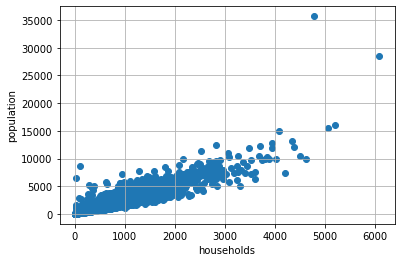

In [19]:
from matplotlib import pyplot

pyplot.scatter(households, population)
pyplot.xlabel("households")
pyplot.ylabel("population")
pyplot.grid(True)
pyplot.show()

In [30]:
# 上記数理モデルでいうと、householdsがx、populationがyになるので、
# これらの情報をもとに、パラメータa, bを計算する

# まずはパラメータaを求める
# 分子となる共分散を求める。
# np.cov()を使うと分散共分散行列が返ってくる
cov_var = np.cov(households, np.transpose(population))
cov = cov_var[0][1]
var = cov_var[0][0]
print("cov =", cov)
print("var =", var)
param_a = cov / var # 標準偏差は分散の平方根
print("param a =", param_a)

print("-------------------------------------------------")

# 次にパラメータbを求める。
mean_x = np.mean(households)
mean_y = np.mean(population)
print("mean of households =", mean_x)
print("mean of population =", mean_y)
param_b = mean_y - param_a * mean_x
print("param b =", param_b)

cov = 401317.2187493346
var = 147856.27705252913
param a = 2.714238629224771
-------------------------------------------------
mean of households = 501.2219411764706
mean of population = 1429.5739411764705
param b = 69.1379866202683


### プロットして学習結果を確認

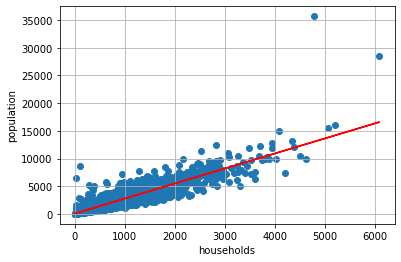

In [33]:
pyplot.scatter(households, population)
pyplot.xlabel("households")
pyplot.ylabel("population")
pyplot.grid(True)

pred_y = households * param_a + param_b

pyplot.plot(households, pred_y, color = "red")
pyplot.show()